<a href="https://colab.research.google.com/github/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis/blob/main/experiments/inceptionNetMCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Training Inception Net with Monte Carlo Dropout 

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!rm -r "COVID-Chest-X-Rays-Deep-Learning-analysis"

In [9]:
# CLONE GITHUB REPOSITORY
!git clone https://github.com/Gialbo/COVID-Chest-X-Rays-Deep-Learning-analysis.git

Cloning into 'COVID-Chest-X-Rays-Deep-Learning-analysis'...
remote: Enumerating objects: 417, done.
remote: Counting objects: 100% (417/417), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 417 (delta 167), reused 258 (delta 55), pack-reused 0
Receiving objects: 100% (417/417), 57.03 MiB | 24.13 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [10]:
# LOAD DIRECTORY
import os
import os.path
import sys
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/data')
sys.path.append('COVID-Chest-X-Rays-Deep-Learning-analysis/models')
!cd "COVID-Chest-X-Rays-Deep-Learning-analysis/data"

In [ ]:
from inceptionNetMCD import inceptionNetMCD

In [ ]:
img_height = 224
img_width = 224
input_shape = (img_height, img_width, 3)
batch_size = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dir = '/content/drive/MyDrive/BIOINF/covid-project/dataset/train'
test_dir = '/content/drive/MyDrive/BIOINF/covid-project/dataset/test'

Train_Gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255, 
                                                            validation_split=0.2,
                                                            rotation_range = 5,
                                                            width_shift_range = 0.05,
                                                            height_shift_range = 0.05,
                                                            zoom_range = 0.01)
Test_Gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

train_ds = Train_Gen.flow_from_directory(train_dir, 
                                                target_size = (img_height, img_width), 
                                                batch_size = batch_size, 
                                                class_mode = 'categorical',
                                                subset='training',
                                                shuffle=True)

validation_ds = Train_Gen.flow_from_directory(train_dir, 
                                                target_size = (img_height, img_width), 
                                                batch_size = batch_size, 
                                                class_mode = 'categorical',
                                                subset='validation',
                                                shuffle=True)

test_ds = Test_Gen.flow_from_directory(test_dir, 
                                              target_size = (img_height, img_width),
                                              class_mode = 'categorical', 
                                              batch_size = batch_size,
                                              shuffle=False)

Found 2755 images belonging to 3 classes.
Found 688 images belonging to 3 classes.
Found 383 images belonging to 3 classes.


In [ ]:
earlystopping = EarlyStopping(
    patience = 10
)

checkpointer = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/BIOINF/checkpoints_classification/modelInc/weightsMCD.hdf5', 
    save_best_only = True,
    monitor = "val_loss"
)

model = inceptionNetMCD()
history = model.fit(
    train_ds,
    validation_data = validation_ds,
    batch_size = batch_size,
    epochs = 200, 
    callbacks = [checkpointer]
)

87916544/87910968 [==============================] - 2s 0us/step
Epoch 1/200
22/22 [==============================] - 1067s 47s/step - loss: 1.1595 - accuracy: 0.3782 - recall: 0.1466 - recall_1: 0.1435 - recall_2: 0.2177 - precision: 0.4650 - precision_1: 0.3685 - precision_2: 0.4147 - val_loss: 7.1099 - val_accuracy: 0.2965 - val_recall: 0.9415 - val_recall_1: 0.0456 - val_recall_2: 0.0000e+00 - val_precision: 0.2942 - val_precision_1: 0.3548 - val_precision_2: 0.0000e+00
Epoch 2/200
22/22 [==============================] - 43s 2s/step - loss: 0.7340 - accuracy: 0.6513 - recall: 0.8054 - recall_1: 0.4656 - recall_2: 0.4841 - precision: 0.8354 - precision_1: 0.5946 - precision_2: 0.6088 - val_loss: 11.0485 - val_accuracy: 0.3532 - val_recall: 0.0341 - val_recall_1: 0.9710 - val_recall_2: 0.0041 - val_precision: 0.3333 - val_precision_1: 0.3524 - val_precision_2: 0.5000
Epoch 3/200
22/22 [==============================] - 43s 2s/step - loss: 0.4231 - accuracy: 0.8501 - recall: 0.9235 -

In [ ]:
weights_path = '/content/drive/MyDrive/BIOINF/checkpoints_classification/modelInc/weightsMCD.hdf5'
model = inceptionNetMCD()
model.load_weights(weights_path)

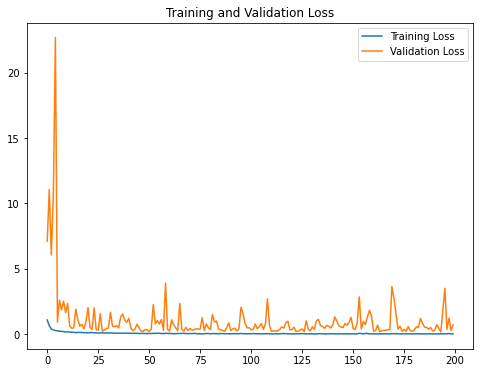

In [ ]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

epochs = range(len(train_loss)) 
plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss)
plt.plot(epochs, valid_loss)
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Training and Validation Loss")
plt.show()

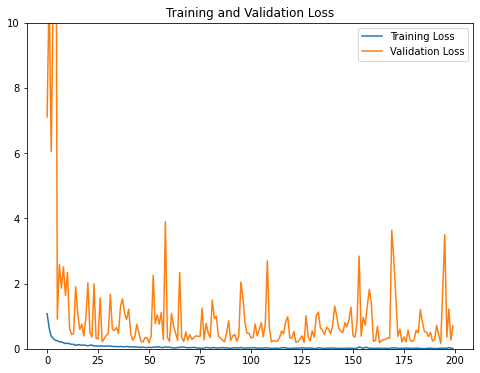

In [ ]:
train_loss = history.history["loss"]
valid_loss = history.history["val_loss"]

epochs = range(len(train_loss)) 
plt.figure(figsize=(8,6))
plt.plot(epochs, train_loss)
plt.plot(epochs, valid_loss)
plt.ylim(0,10)
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Training and Validation Loss")
plt.show()

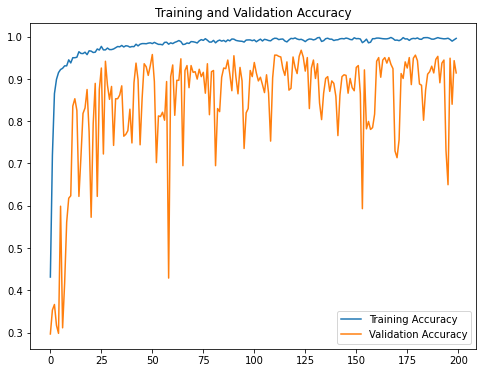

In [ ]:
train_acc = history.history["accuracy"]
valid_acc = history.history["val_accuracy"]

epochs = range(len(train_acc)) 
plt.figure(figsize=(8,6))
plt.plot(epochs, train_acc)
plt.plot(epochs, valid_acc)
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.title("Training and Validation Accuracy")
plt.show()

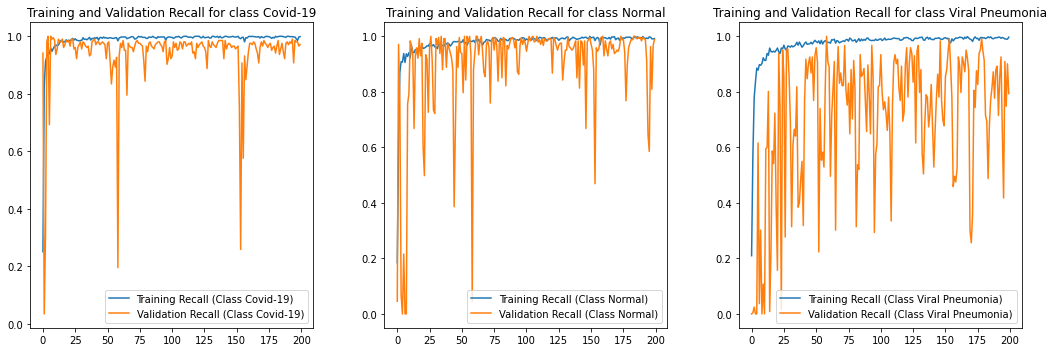

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

train_rec_0 = history.history["recall"]
valid_rec_0 = history.history["val_recall"]
train_rec_1 = history.history["recall_1"]
valid_rec_1 = history.history["val_recall_1"]
train_rec_2 = history.history["recall_2"]
valid_rec_2 = history.history["val_recall_2"]

epochs = range(len(train_rec_0)) 

axs[0].plot(epochs, train_rec_0)
axs[0].plot(epochs, valid_rec_0)
axs[0].legend(["Training Recall (Class Covid-19)", "Validation Recall (Class Covid-19)"])
axs[0].set_title("Training and Validation Recall for class Covid-19")

axs[1].plot(epochs, train_rec_1)
axs[1].plot(epochs, valid_rec_1)
axs[1].legend(["Training Recall (Class Normal)", "Validation Recall (Class Normal)"])
axs[1].set_title("Training and Validation Recall for class Normal")

axs[2].plot(epochs, train_rec_2)
axs[2].plot(epochs, valid_rec_2)
axs[2].legend(["Training Recall (Class Viral Pneumonia)", "Validation Recall (Class Viral Pneumonia)"])
axs[2].set_title("Training and Validation Recall for class Viral Pneumonia")

fig.tight_layout()

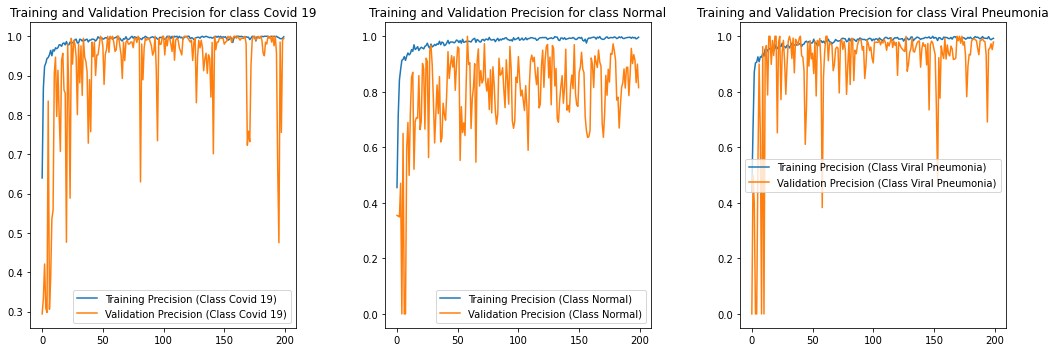

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

train_pre_0 = history.history["precision"]
valid_pre_0 = history.history["val_precision"]
train_pre_1 = history.history["precision_1"]
valid_pre_1 = history.history["val_precision_1"]
train_pre_2 = history.history["precision_2"]
valid_pre_2 = history.history["val_precision_2"]

epochs = range(len(train_pre_0)) 

axs[0].plot(epochs, train_pre_0)
axs[0].plot(epochs, valid_pre_0)
axs[0].legend(["Training Precision (Class Covid 19)", "Validation Precision (Class Covid 19)"])
axs[0].set_title("Training and Validation Precision for class Covid 19")

axs[1].plot(epochs, train_pre_1)
axs[1].plot(epochs, valid_pre_1)
axs[1].legend(["Training Precision (Class Normal)", "Validation Precision (Class Normal)"])
axs[1].set_title("Training and Validation Precision for class Normal")

axs[2].plot(epochs, train_pre_2)
axs[2].plot(epochs, valid_pre_2)
axs[2].legend(["Training Precision (Class Viral Pneumonia)", "Validation Precision (Class Viral Pneumonia)"])
axs[2].set_title("Training and Validation Precision for class Viral Pneumonia")

fig.tight_layout()

In [ ]:
model.evaluate(test_ds, verbose=2)

3/3 - 80s - loss: 0.3041 - accuracy: 0.9138 - recall_3: 1.0000 - recall_4: 0.8134 - recall_5: 0.9403 - precision_3: 0.8984 - precision_4: 0.9820 - precision_5: 0.8750


[0.3041241466999054,
 0.9138381481170654,
 1.0,
 0.8134328126907349,
 0.9402984976768494,
 0.8984375,
 0.9819819927215576,
 0.875]

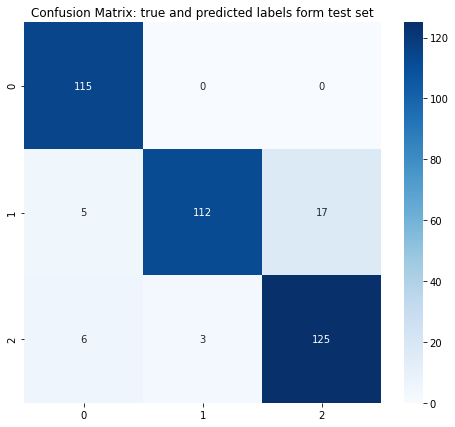

In [ ]:
pred = model.predict(test_ds) 
pred = np.argmax(pred, axis = 1)

actual = test_ds.classes

plt.figure(figsize=(8,7))
cm = confusion_matrix(actual, pred, labels = [0, 1, 2])
sns.heatmap(cm,  cmap="Blues", annot = True, fmt = "d"
)
plt.title("Confusion Matrix: true and predicted labels form test set")
plt.show()

In [ ]:
print(classification_report(actual, pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       115
           1       0.97      0.84      0.90       134
           2       0.88      0.93      0.91       134

    accuracy                           0.92       383
   macro avg       0.92      0.92      0.92       383
weighted avg       0.92      0.92      0.92       383



# Compare deterministic net and MC dropout net

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

def compute_uncertainties(net, X):
    # MC times predictions for a single image
    p_hat = list()
    MC = 100
    for t in range(MC):
      p_hat.append(net.predict(X))
    p_hat = np.array(p_hat)
    #print("P hat shape: ", p_hat.shape)
    # Mean over MC samples
    mean_probs_over_draw = np.mean(p_hat, axis=0)
    #print("Mean over MC samples", mean_probs_over_draw.shape)
    predictions_uncertainty = np.argmax(mean_probs_over_draw, axis=1)

    aleatoric = np.mean(p_hat * (1 - p_hat), axis=0)
    epistemic = np.mean(p_hat ** 2, axis=0) - np.mean(p_hat, axis=0) ** 2

    uncertainties_among_labels = epistemic + aleatoric

    predicted_class_variances = np.asarray([uncertainty[prediction] for prediction, uncertainty in
                                            zip(predictions_uncertainty, uncertainties_among_labels)])

    return predictions_uncertainty, predicted_class_variances
    
def compute_uncertainties_softmax(net, X):
    # Softmax std per single predictions --> Softmax uncertainty
    predictions = net.predict(X)
    # prediction per samples are column vector
    # we want to compute the standard deviation for each row -> axis=1
    std_predictions = np.std(predictions, axis=1)
    return std_predictions

def plot_random_images(images, examples=16, fig_suptitle=None, figsize=(8,8), fpath=None):

    imgs_index = np.random.choice(np.arange(len(images)), examples, replace=False)

    plot = MyPlot(int(examples/np.sqrt(examples)), 
                  int(examples/np.sqrt(examples)), 
                  figsize=figsize)
    plot.axes = plot.axes.ravel()
    image_shape = images[0].shape
    for idx, _ in enumerate(plot.axes):
        X = images[imgs_index[idx]]
        if len(image_shape) == 2:
            plot.axes[idx].imshow(X=X,cmap="gray")
        else:
            plot.axes[idx].imshow(X=X)
        plot.axes[idx].axis('off')
    plot.fig.suptitle(fig_suptitle, fontsize=16)
    if fpath:
        plot.fig.savefig(fpath)

In [ ]:
from inceptionNetMCD import inceptionNetMCD
weights_path = '/content/drive/MyDrive/BIOINF/checkpoints_classification/modelInc/weightsMCD.hdf5'
MCDModel = inceptionNetMCD()
MCDModel.load_weights(weights_path)

In [12]:
from inceptionNet import inceptionNet
weights_path = '/content/drive/MyDrive/BIOINF/checkpoints_classification/modelInc/weights.hdf5'
detModel = inceptionNet()
detModel.load_weights(weights_path)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
MCDModel.evaluate(test_ds, verbose=2)

3/3 - 5s - loss: 0.2434 - accuracy: 0.9191 - recall: 1.0000 - recall_1: 0.8358 - recall_2: 0.9254 - precision: 0.9055 - precision_1: 0.9655 - precision_2: 0.8921


[0.24335674941539764,
 0.9190600514411926,
 1.0,
 0.8358209133148193,
 0.9253731369972229,
 0.9055117964744568,
 0.9655172228813171,
 0.8920863270759583]

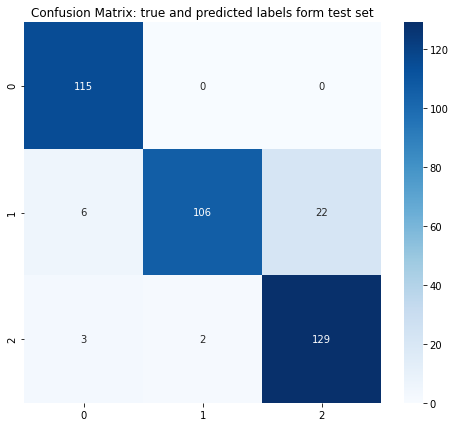

In [ ]:
MCDpred = MCDModel.predict(test_ds) 
MCDpred = np.argmax(MCDpred, axis = 1)

actual = test_ds.classes

plt.figure(figsize=(8,7))
cm = confusion_matrix(actual, MCDpred, labels = [0, 1, 2])
sns.heatmap(cm,  cmap="Blues", annot = True, fmt = "d"
)
plt.title("Confusion Matrix: true and predicted labels form test set")
plt.show()

In [ ]:
detModel.evaluate(test_ds, verbose=2)

3/3 - 4s - loss: 0.3558 - accuracy: 0.9347 - recall_3: 0.9739 - recall_4: 0.9776 - recall_5: 0.8582 - precision_3: 1.0000 - precision_4: 0.8618 - precision_5: 0.9664


[0.35580727458000183,
 0.934725821018219,
 0.9739130139350891,
 0.9776119589805603,
 0.858208954334259,
 1.0,
 0.8618420958518982,
 0.9663865566253662]

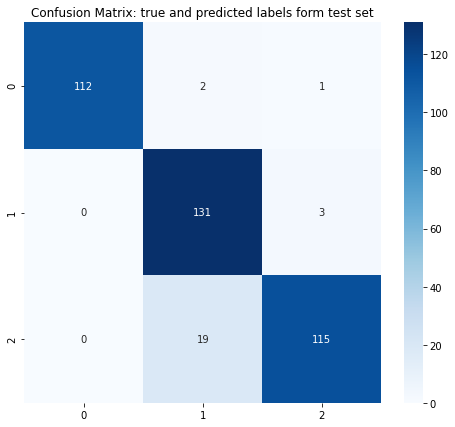

In [ ]:
DETpred = detModel.predict(test_ds) 
DETpred = np.argmax(DETpred, axis = 1)

plt.figure(figsize=(8,7))
cm = confusion_matrix(actual, DETpred, labels = [0, 1, 2])
sns.heatmap(cm,  cmap="Blues", annot = True, fmt = "d"
)
plt.title("Confusion Matrix: true and predicted labels form test set")
plt.show()

In [ ]:
# prediction uncertainties
softmax_uncertainty_det = compute_uncertainties_softmax(detModel, test_ds)
predictions_uncertainty_mcd, predicted_class_variances_mcd = compute_uncertainties(MCDModel, test_ds)

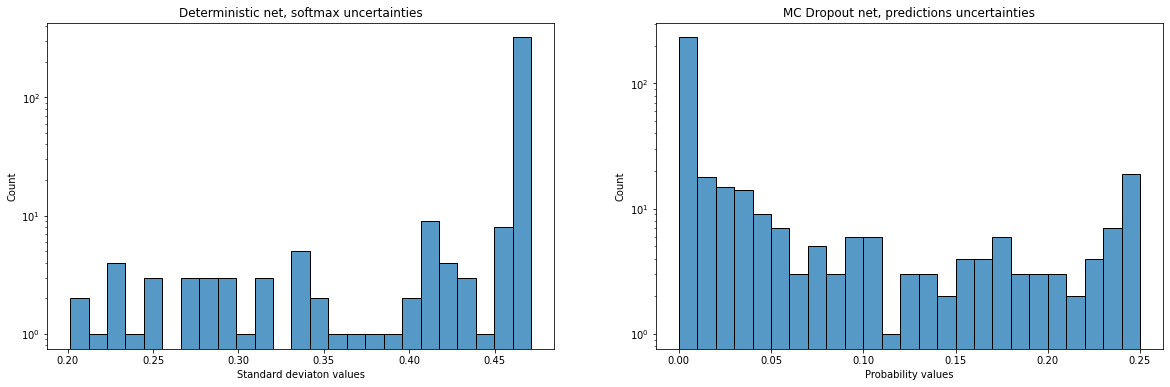

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].set_title("Deterministic net, softmax uncertainties")
ax[0].set_xlabel("Standard deviaton values")
ax[0].set_yscale('log')
sns.histplot(ax=ax[0], data=softmax_uncertainty_det, bins=25)
ax[1].set_title("MC Dropout net, predictions uncertainties")
ax[1].set_xlabel("Probability values")
ax[1].set_yscale('log')
sns.histplot(ax=ax[1], data=predicted_class_variances_mcd, bins=25)

In [ ]:
sure = np.where(predicted_class_variances_mcd < 0.05)[0]
uncertain = np.where(predicted_class_variances_mcd > 0.22)[0]
print("MCD model")
print("Total predictions: ", len(predicted_class_variances_mcd))
print("Sure predictions: ", len(sure))
print("Unsure predictions: ", len(uncertain))

MCD model
Total predictions:  383
Sure predictions:  289
Unsure predictions:  30


In [ ]:
sure = np.where(softmax_uncertainty_det < 0.25)[0]
uncertain = np.where(softmax_uncertainty_det > 0.40)[0]
print("MCD model")
print("Total predictions: ", len(softmax_uncertainty_det))
print("Sure predictions: ", len(sure))
print("Unsure predictions: ", len(uncertain))

MCD model
Total predictions:  383
Sure predictions:  9
Unsure predictions:  347


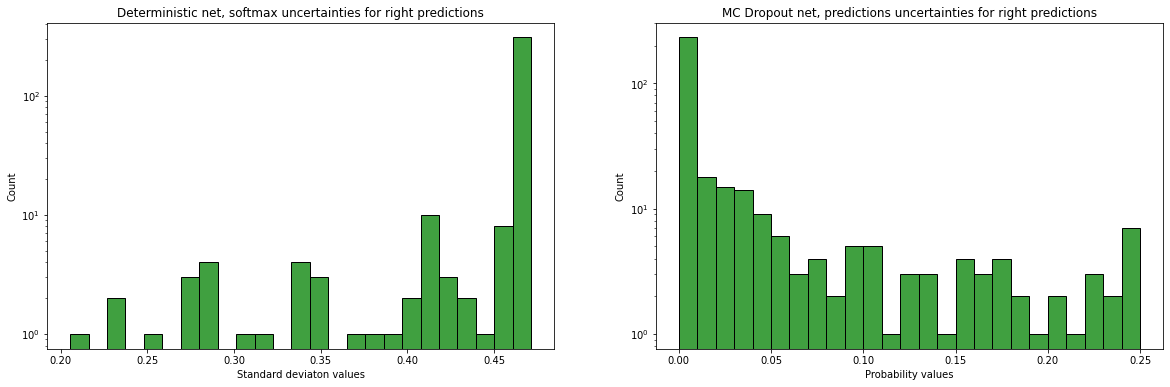

In [ ]:
# right predictions
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].set_title("Deterministic net, softmax uncertainties for right predictions")
ax[0].set_xlabel("Standard deviaton values")
ax[0].set_yscale('log')
sns.histplot(ax=ax[0], data=softmax_uncertainty_det[actual == DETpred], bins=25, color="green")
ax[1].set_title("MC Dropout net, predictions uncertainties for right predictions")
ax[1].set_xlabel("Probability values")
ax[1].set_yscale('log')
sns.histplot(ax=ax[1], data=predicted_class_variances_mcd[actual == MCDpred], bins=25, color="green")

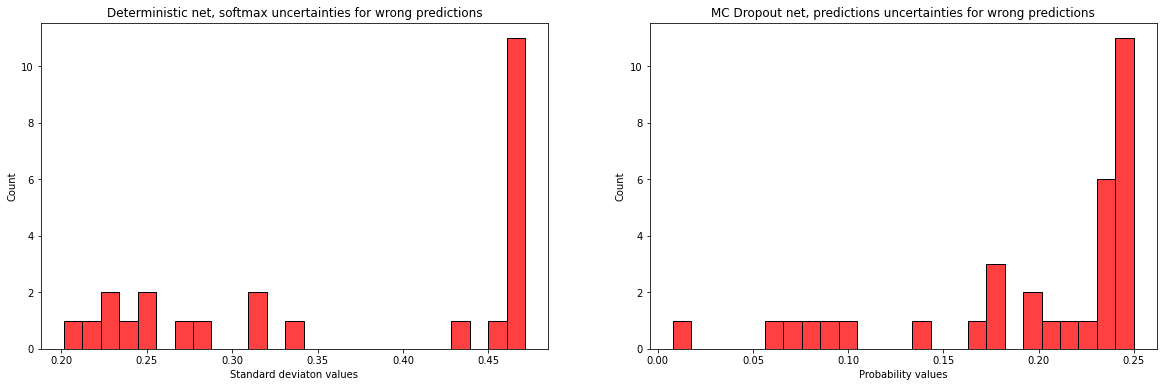

In [ ]:
# wrong predictions
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].set_title("Deterministic net, softmax uncertainties for wrong predictions")
ax[0].set_xlabel("Standard deviaton values")
sns.histplot(ax=ax[0], data=softmax_uncertainty_det[actual != DETpred], bins=25, color="red")
ax[1].set_title("MC Dropout net, predictions uncertainties for wrong predictions")
ax[1].set_xlabel("Probability values")
sns.histplot(ax=ax[1], data=predicted_class_variances_mcd[actual != MCDpred], bins=25, color="red")
# rete MCD molto insicura (picco a destro)